In [17]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pylab import rcParams
import copy

import matplotlib
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [18]:
path = "/home/mfmezger/data/AI_Clinic_Data/NORA_EXPORT/patients_features.csv"

df = pd.read_csv(path,)

df.head()

,Unnamed: 0,Gruppe,Image,firstorder_10Percentile,firstorder_90Percentile,firstorder_Energy,firstorder_Entropy,firstorder_InterquartileRange,firstorder_Kurtosis,firstorder_Maximum,...,shape_Maximum2DDiameterColumn,shape_Maximum2DDiameterRow,shape_Maximum2DDiameterSlice,shape_Maximum3DDiameter,shape_MeshVolume,shape_MinorAxisLength,shape_Sphericity,shape_SurfaceArea,shape_SurfaceVolumeRatio,shape_VoxelVolume
0,0,1,AT,15.000000,130.333333,5.303353e+07,2.287477,72.333333,16.190133,303.333333,...,36.246272,39.365565,36.116828,42.219042,14605.323474,27.694685,0.670818,4345.714797,0.298538,14686.584473
1,1,1,BG,-4.800000,98.233333,6.471675e+06,2.576310,50.000000,3.691889,136.333333,...,29.418343,31.460798,23.062575,33.581700,4181.742668,17.269831,0.720193,1737.081653,0.434335,4244.804382
2,2,1,BH,35.600000,177.666667,1.120756e+07,3.048903,84.750000,2.750291,294.333333,...,20.137708,23.410549,18.351658,23.938229,1612.623533,12.451577,0.709901,931.717646,0.596498,1657.485962
3,3,2,EG,46.500000,110.500000,1.012544e+08,2.158269,33.000000,4.483693,173.000000,...,55.724196,52.793601,57.668894,63.320705,38169.682026,37.002193,0.680302,8033.691939,0.215247,38301.944733
4,4,3,FG,49.533333,98.666667,7.141937e+07,1.868863,25.000000,16.662601,203.666667,...,59.847388,46.457050,47.050257,62.552279,34058.888753,33.026480,0.665879,7913.319239,0.256929,34209.251404


In [19]:
df = df.drop(["Image", "Unnamed: 0"], axis=1)

In [20]:
df.head(16)

,Gruppe,firstorder_10Percentile,firstorder_90Percentile,firstorder_Energy,firstorder_Entropy,firstorder_InterquartileRange,firstorder_Kurtosis,firstorder_Maximum,firstorder_Mean,firstorder_MeanAbsoluteDeviation,...,shape_Maximum2DDiameterColumn,shape_Maximum2DDiameterRow,shape_Maximum2DDiameterSlice,shape_Maximum3DDiameter,shape_MeshVolume,shape_MinorAxisLength,shape_Sphericity,shape_SurfaceArea,shape_SurfaceVolumeRatio,shape_VoxelVolume
0,1,15.000000,130.333333,5.303353e+07,2.287477,72.333333,16.190133,303.333333,71.462075,38.156397,...,36.246272,39.365565,36.116828,42.219042,14605.323474,27.694685,0.670818,4345.714797,0.298538,14686.584473
1,1,-4.800000,98.233333,6.471675e+06,2.576310,50.000000,3.691889,136.333333,56.687937,32.708582,...,29.418343,31.460798,23.062575,33.581700,4181.742668,17.269831,0.720193,1737.081653,0.434335,4244.804382
2,1,35.600000,177.666667,1.120756e+07,3.048903,84.750000,2.750291,294.333333,111.593675,45.473425,...,20.137708,23.410549,18.351658,23.938229,1612.623533,12.451577,0.709901,931.717646,0.596498,1657.485962
3,2,46.500000,110.500000,1.012544e+08,2.158269,33.000000,4.483693,173.000000,78.711733,20.482707,...,55.724196,52.793601,57.668894,63.320705,38169.682026,37.002193,0.680302,8033.691939,0.215247,38301.944733
4,3,49.533333,98.666667,7.141937e+07,1.868863,25.000000,16.662601,203.666667,74.621760,16.379994,...,59.847388,46.457050,47.050257,62.552279,34058.888753,33.026480,0.665879,7913.319239,0.256929,34209.251404
5,2,1.333333,184.166667,5.284705e+07,3.327202,79.666667,36.926776,890.333333,88.315517,69.326957,...,27.065751,28.125349,23.734316,40.836546,5258.003871,17.127980,0.680676,2170.573705,0.422970,5335.807800
6,1,46.333333,105.333333,9.812075e+07,2.009039,29.666667,19.353264,425.000000,76.484769,18.452930,...,51.442214,54.534442,47.348145,57.428926,51835.616430,36.548671,0.609419,13687.177026,0.282828,51473.617554
7,2,21.666667,84.666667,1.114973e+07,2.107497,32.666667,7.013800,216.000000,53.726332,20.477627,...,31.703827,32.496834,25.460579,35.706870,9678.284327,19.750971,0.720898,3049.014402,0.438773,9754.180908
8,3,11.950000,103.000000,3.069490e+06,2.602458,49.375000,11.640448,139.000000,57.078135,30.722192,...,21.316430,20.082086,18.302776,23.874213,1648.366451,12.303117,0.711346,930.291420,0.614447,1692.295074
9,2,48.000000,103.500000,2.823748e+07,1.966116,25.000000,16.602893,155.500000,77.282738,18.825654,...,40.637328,35.045052,41.385170,48.541617,11818.706989,27.383870,0.663750,3779.542671,0.320033,11916.160583


# Multidimensional Scaling

In [21]:
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances

In [22]:
y = df['Gruppe']
X = df.drop(["Gruppe"], axis=1)
#X = preprocessing.normalize(X)
x = np.array(X)

In [23]:
similarities = euclidean_distances(x)


seed = np.random.RandomState(seed=3)

mds = MDS(n_components=2, max_iter=5000, eps=1e-12, random_state=seed,
                   n_init=10,
                   dissimilarity="precomputed", n_jobs=1, metric=False)
pos = mds.fit_transform(similarities)

<ipython-input-24-014e479a1b04>:24: RuntimeWarning: divide by zero encountered in true_divide
  similarities = similarities.max() / similarities * 100


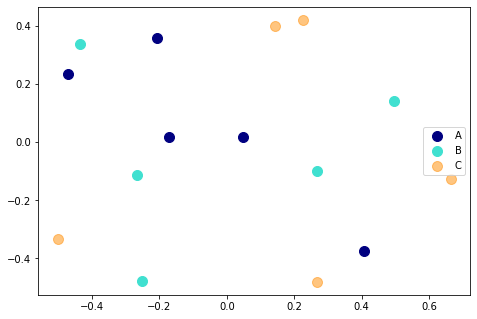

In [24]:

# Plot

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.cm as cm


fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

s = 100

# Type of tumor
a = [0,1,2,6,11]
b = [3,5,7,9,13]
c = [4,8,10,12,14]

plt.scatter(pos[a, 0], pos[a, 1], color='navy', alpha=1.0, s=s, lw=1, label='A')
plt.scatter(pos[b, 0], pos[b, 1], color='turquoise', alpha=1.0, s=s, lw=1, label='B')
plt.scatter(pos[c, 0], pos[c, 1], color='darkorange', alpha=0.5, s=s, lw=1, label='C')

plt.legend(scatterpoints=1, loc=5, shadow=False)

similarities = similarities.max() / similarities * 100
similarities[np.isinf(similarities)] = 0
plt.show()

In [25]:
def calc_confusion_matrix(prediction, test):
    cm = confusion_matrix(test, prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
    disp.plot(cmap="Blues")

In [26]:
X = preprocessing.normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11, stratify=y)
np.unique(y, return_counts=True)

(array([1, 2, 3]), array([5, 5, 5]))

In [27]:
parameters = {'n_neighbors':[0,1,2,3,4,5,6,7]}
clf = KNeighborsClassifier()
clf = GridSearchCV(clf, parameters, n_jobs=-1, verbose=10)
clf.fit(X_train, y_train)
clf.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [28]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
prob01 = clf.predict(X_test)
cm = visualize_results(prob01, y_test)

NameError: name 'visualize_results' is not defined

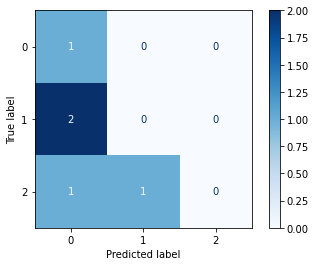

In [30]:
calc_confusion_matrix(prob01, y_test)

In [31]:
df_feature_selection_cat = copy.deepcopy(df)

df_feature_selection_cat = df_feature_selection_cat[["firstorder_Energy", "firstorder_Entropy", "firstorder_Kurtosis", "Gruppe", "firstorder_Skewness"]]

In [32]:
df_feature_selection_cat.head()

,firstorder_Energy,firstorder_Entropy,firstorder_Kurtosis,Gruppe,firstorder_Skewness
0,5.303353e+07,2.287477,16.190133,1,0.184551
1,6.471675e+06,2.576310,3.691889,1,-1.066357
2,1.120756e+07,3.048903,2.750291,1,-0.158444
3,1.012544e+08,2.158269,4.483693,2,-0.510409
4,7.141937e+07,1.868863,16.662601,3,-1.068774


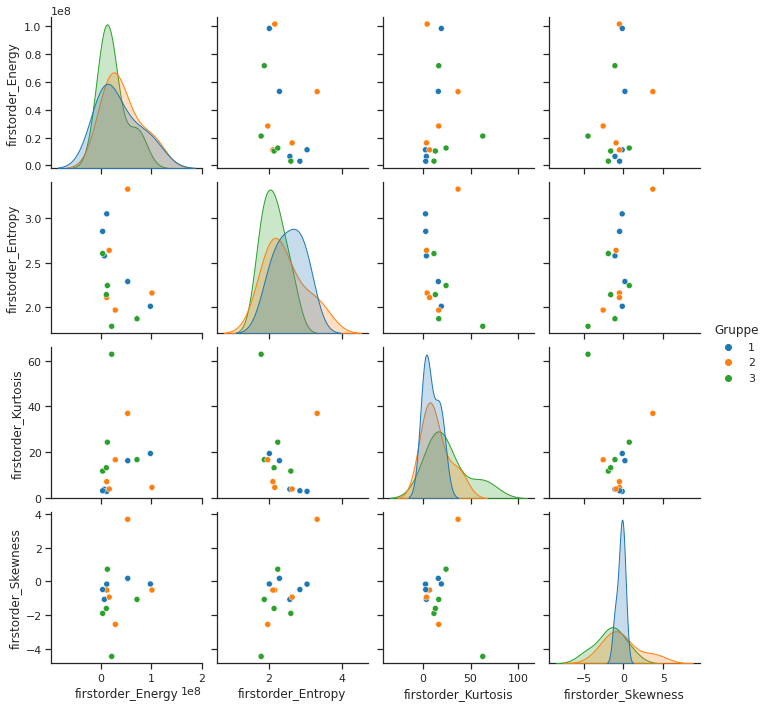

In [33]:
# skewness + kurtosis intervall sehr eng.
sns.set(style="ticks")
cmap =sns.color_palette('tab10', n_colors=3)
sns.pairplot(df_feature_selection_cat, hue="Gruppe", palette=cmap)

In [34]:
# plots für alle verteilungen.

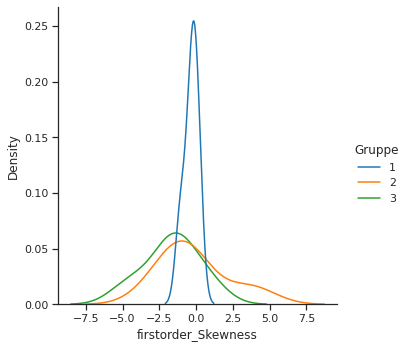

In [35]:
sns.displot(df, x="firstorder_Skewness", hue="Gruppe",  kind="kde", palette=cmap)

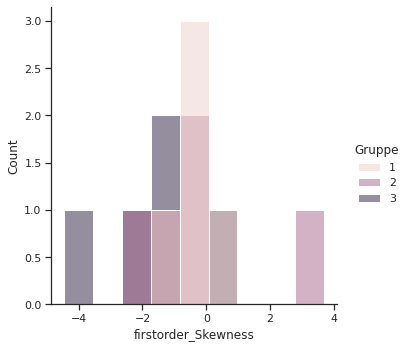

In [40]:
sns.displot(df, x="firstorder_Skewness", hue="Gruppe")